In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [4]:
!nvidia-smi

Mon Mar  1 10:10:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 45%   82C    P2   116W / 250W |  10919MiB / 10989MiB |     60%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 35%   57C    P2    59W / 250W |   6902MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [2]:
import torch
torch.cuda.set_device(2)

In [3]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [4]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [5]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [6]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest34'),
    MixUp(),
]

In [7]:
learn = timm_learner(dls512, 'resnet34d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=2.290867567062378)

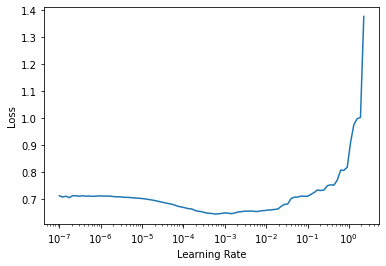

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.217967,0.743879,0.626433,0.728188,0.487093,00:21


Better model found at epoch 0 with valid_loss value: 0.743878960609436.


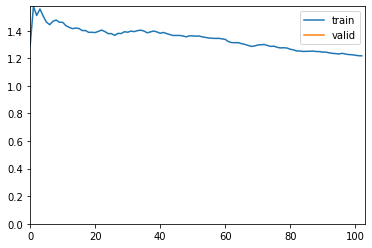

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.079222,0.716827,0.636693,0.731942,0.511785,00:24
1,1.071936,0.700232,0.650573,0.740741,0.538721,00:24
2,1.027934,0.687486,0.656608,0.752351,0.538721,00:25
3,1.015563,0.669468,0.659022,0.740413,0.563412,00:25
4,1.023464,0.672718,0.661436,0.757812,0.544332,00:25
5,0.999981,0.642412,0.677731,0.754636,0.593715,00:25
6,1.010517,0.640422,0.678938,0.764359,0.582492,00:25
7,1.004715,0.626511,0.691008,0.767278,0.610550,00:25
8,0.947802,0.618864,0.689801,0.769671,0.603816,00:25
9,0.951835,0.596209,0.708509,0.769129,0.654321,00:25


Better model found at epoch 0 with valid_loss value: 0.7168272137641907.


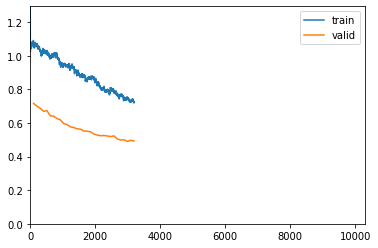

Better model found at epoch 1 with valid_loss value: 0.7002317309379578.
Better model found at epoch 2 with valid_loss value: 0.6874856352806091.
Better model found at epoch 3 with valid_loss value: 0.669468343257904.
Better model found at epoch 5 with valid_loss value: 0.6424123644828796.
Better model found at epoch 6 with valid_loss value: 0.6404215693473816.
Better model found at epoch 7 with valid_loss value: 0.62651127576828.
Better model found at epoch 8 with valid_loss value: 0.6188642978668213.
Better model found at epoch 9 with valid_loss value: 0.5962094664573669.
Better model found at epoch 10 with valid_loss value: 0.5909145474433899.
Better model found at epoch 11 with valid_loss value: 0.5768991112709045.
Better model found at epoch 12 with valid_loss value: 0.5729200839996338.
Better model found at epoch 13 with valid_loss value: 0.5649449229240417.
Better model found at epoch 14 with valid_loss value: 0.5634213089942932.
Better model found at epoch 15 with valid_loss va

In [8]:
learn.fine_tune(100,base_lr=1e-4)

In [9]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [10]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [11]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [12]:
learn.freeze()

In [13]:
learn.dls=dls512

In [12]:
#learn.load('hrnet')

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

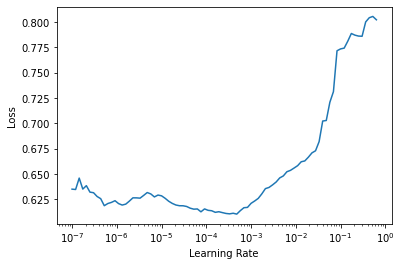

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.048497,0.765552,0.542813,0.529412,0.537736,00:10


Better model found at epoch 0 with valid_loss value: 0.7655521631240845.


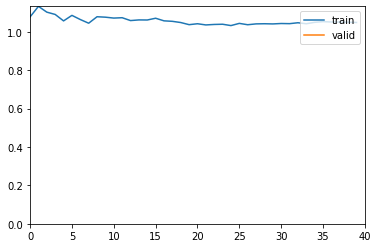

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.013111,0.773872,0.527523,0.512894,0.562893,00:11
1,1.040812,0.776716,0.556575,0.539548,0.600629,00:11
2,1.036629,0.768633,0.533639,0.517711,0.597484,00:11
3,1.033736,0.768394,0.547401,0.530055,0.610063,00:11
4,1.065666,0.766804,0.545872,0.529745,0.588050,00:11
5,1.039787,0.771643,0.547401,0.529730,0.616352,00:11
6,1.041331,0.755537,0.550459,0.533898,0.594340,00:11
7,1.031479,0.764008,0.541284,0.524590,0.603774,00:11
8,1.030854,0.754016,0.542813,0.526316,0.597484,00:11
9,1.029708,0.758531,0.545872,0.528455,0.613208,00:11


Better model found at epoch 0 with valid_loss value: 0.7738723158836365.


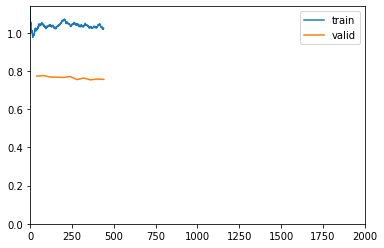

Better model found at epoch 2 with valid_loss value: 0.7686334848403931.
Better model found at epoch 3 with valid_loss value: 0.7683944702148438.
Better model found at epoch 4 with valid_loss value: 0.7668038010597229.
Better model found at epoch 6 with valid_loss value: 0.755536675453186.
Better model found at epoch 8 with valid_loss value: 0.7540163397789001.
No improvement since epoch 8: early stopping


In [14]:
learn.fine_tune(50,base_lr=1e-5)

In [15]:
learn.dls = dlsTest

In [16]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.519559919834137.


(#4) [0.7864082455635071,0.519559919834137,0.5441176470588235,0.5954022988505747]